# Challenge Telecom X

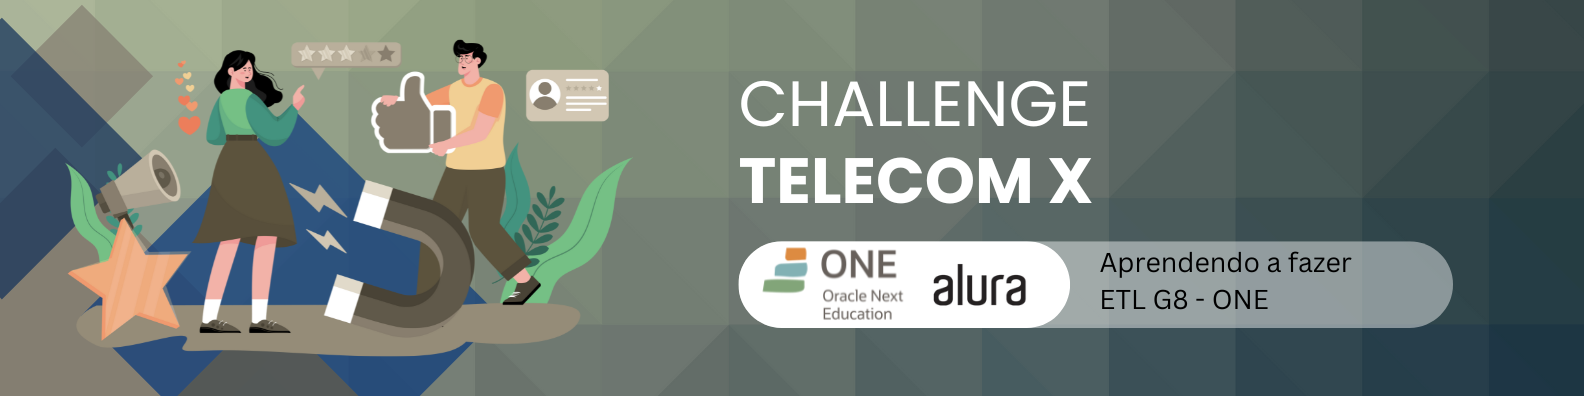

## Telecom X - Análise de Evasão de Clientes
A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Para isso, é encessário coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da análise, os demais colegas da equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

O que você será praticado:
✅ Importar e manipular dados de uma API de forma eficiente.
✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.
✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.
✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Extração de Dados

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [3]:
df = pd.read_json(url)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Como podemos ver, as colunas "customer", "phone", "internet" e "account" possuem dados aninhados, o que dificulta a análise de dados. Para isso, precisamos normalizar esses dados.

## Tratamento dos Dados

Será construído um novo dataframe, contendo as colunas simples do dataframe original e concatenando com as demais colunas normalizadas.

In [6]:
df_normalizado = pd.concat([
    df[['customerID', 'Churn']],
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account'])
], axis=1)

In [7]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_normalizado.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [9]:
df_normalizado.shape

(7267, 21)

In [10]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Como podemos ver nas informações das colunas, o tipo da coluna Charges.Total é object e isso impacta diretamente em nossa análise. Será necessário converter esses dados para o formato float.

In [11]:
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

Além disso, devemos conferir a existência de dados nulos e de dados duplicados, que podem afetar a análise final.

Como podemos ver, existem algumas linhas em que Churn não está marcado nem como 'Não' nem como 'Sim'. Para nossa análise, iremos remover esses itens.

In [12]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
df_normalizado.duplicated().any()

np.False_

In [14]:
df_normalizado[df_normalizado['Charges.Total'].isna()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


O dataset normalizado não contém dados duplicados, entretanto, foram encontradas algumas linhas nulas em Charges.Total. É possível calcular essa coluna ao multiplicar as taxas mensais pela quantidade de meses. Esse valor nulo provavelmente se refere a clientes que acabaram de assinar um contrato com a empresa.

In [15]:
df_normalizado.loc[df_normalizado['Charges.Total'].isna(), 'Charges.Total'] = (
    df_normalizado.loc[df_normalizado['Charges.Total'].isna(), 'Charges.Monthly'] *
    df_normalizado.loc[df_normalizado['Charges.Total'].isna(), 'tenure']
)

In [16]:
df_normalizado[df_normalizado['Charges.Total'] == 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


Agora, iremos verificar todas as colunas que possuem 'Sim' ou 'Não' para padronizar e facilitar os cálculos futuramente. Em seguira, será esses valores serão convertidos em 1 e 0.

In [17]:
for col in df_normalizado.select_dtypes(include='object'):
    print(f"{col}: {df_normalizado[col].unique()}\n")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes' 'No phone service']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['Yes' 'No' 'No internet service']

StreamingTV: ['Yes' 'No' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']



Percebe-se que existem Churns que não estão nem registrados como 'Não' ou como 'Sim'. Devemos remover essas linhas pois elas podem impactar em nossa análise final.

In [18]:
df_normalizado = df_normalizado[df_normalizado['Churn'] != '']

In [19]:
df_normalizado['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Agora sim transformaremos todas as colunas que possuem apenas as opções 'Sim' ou 'Não' em colunas que possuem apenas as opções '1' e '0'.

In [20]:
binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binarias:
    df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-20-2697064792.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-20-2697064792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado[col] = df_normalizado[col].replace({'Yes': 1, 'No': 0})


Por fim, criaremos uma coluna Contas_Diarias que nos ajudará futuramente durante a etapa de análise dos dados.

In [21]:
df_normalizado['Contas Diarias'] = df_normalizado['Charges.Monthly'] / 30

In [22]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

E finalmente, vamos padronizar os nomes das colunas para melhor visualização do dataset durante a análise.

In [23]:
df_normalizado.rename(columns={
    'customerID': 'customerID',
    'Churn': 'Churn',
    'gender': 'Sexo',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Parceiro',
    'Dependents': 'Dependentes',
    'tenure': 'Meses Contrato',
    'PhoneService': 'Servico Telefonico',
    'MultipleLines': 'Multiplas Linhas',
    'InternetService': 'Servico Internet',
    'OnlineSecurity': 'Seguranca Online',
    'OnlineBackup': 'Backup Online',
    'DeviceProtection': 'Protecao Dispositivo',
    'TechSupport': 'Suporte Tecnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Filmes',
    'Contract': 'Tipo Contrato',
    'PaperlessBilling': 'Fatura Online',
    'PaymentMethod': 'Forma Pagamento',
    'Charges.Monthly': 'Mensalidade',
    'Charges.Total': 'Gasto Total',
    'Contract': 'Tipo Contrato',
    'PaymentMethod': 'Forma Pagamento'
}, inplace=True)

In [24]:
df_normalizado.head()

,customerID,Churn,Sexo,Idoso,Parceiro,Dependentes,Meses Contrato,Servico Telefonico,Multiplas Linhas,Servico Internet,...,Protecao Dispositivo,Suporte Tecnico,Streaming TV,Streaming Filmes,Tipo Contrato,Fatura Online,Forma Pagamento,Mensalidade,Gasto Total,Contas Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


Agora que terminamos de tratar os dados, temos um dataframe tratado e preparado para ser analisado.

## Análise dos Dados

In [25]:
df_normalizado.describe()

,Churn,Idoso,Parceiro,Dependentes,Meses Contrato,Servico Telefonico,Fatura Online,Mensalidade,Gasto Total,Contas Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Vamos verificar a distribuição por evasão (Churn).

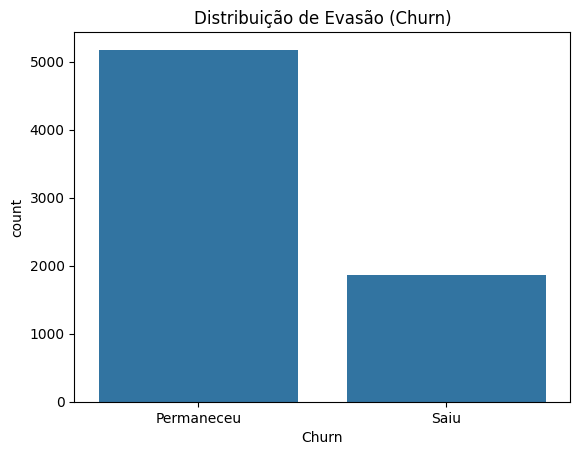

In [26]:
sns.countplot(x='Churn', data=df_normalizado)
plt.title('Distribuição de Evasão (Churn)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

Vamos verificar agora como se comporta a evasão de clientes baseada em cada uma das variáveis categóricas.

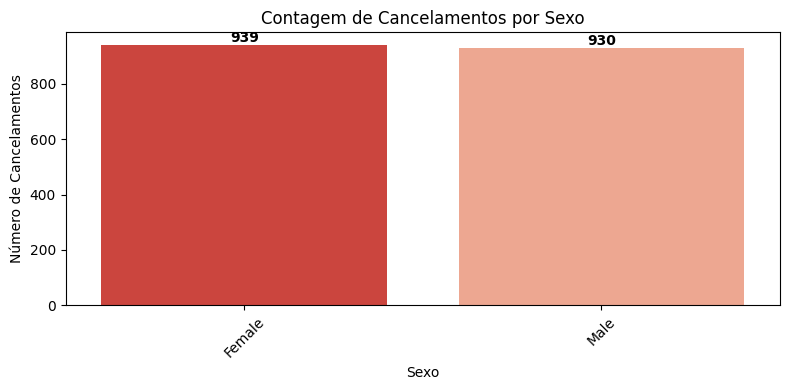

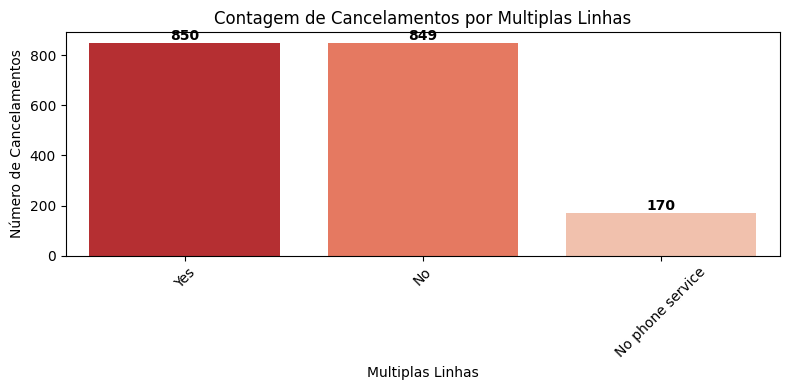

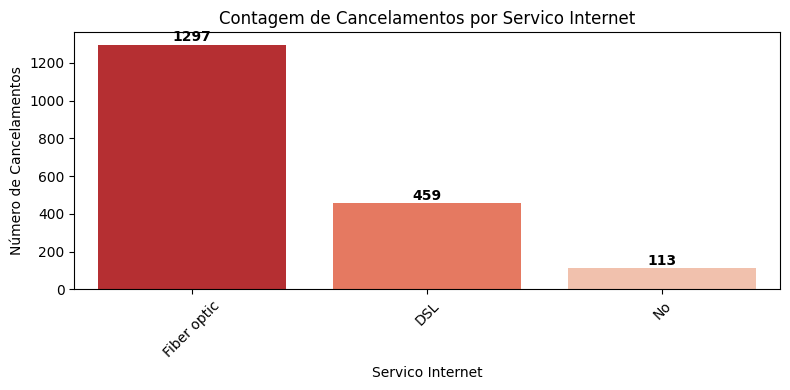

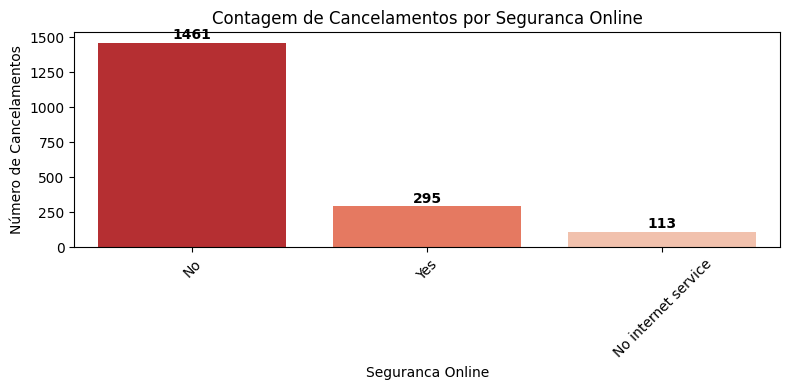

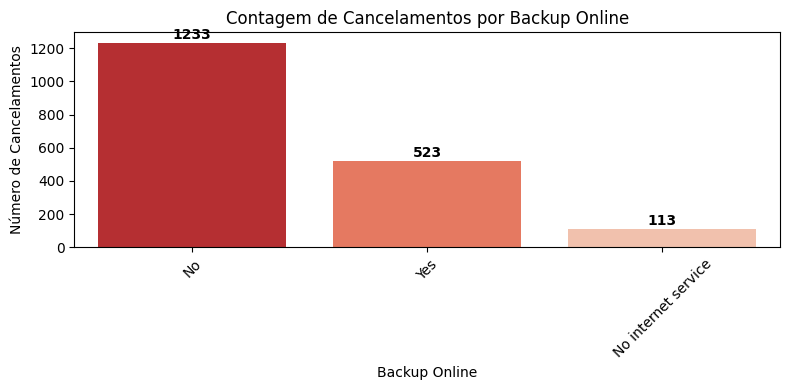

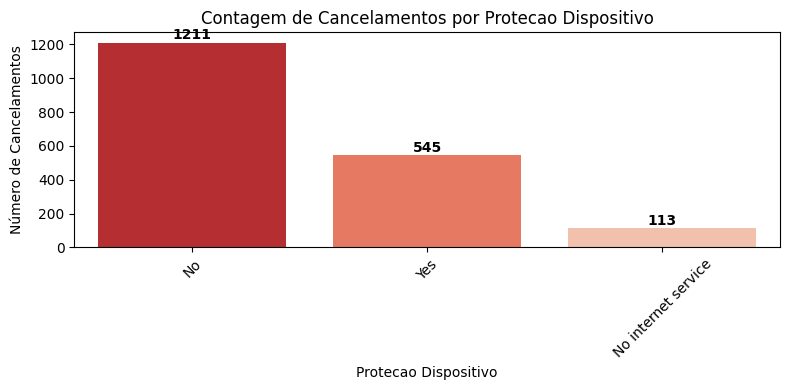

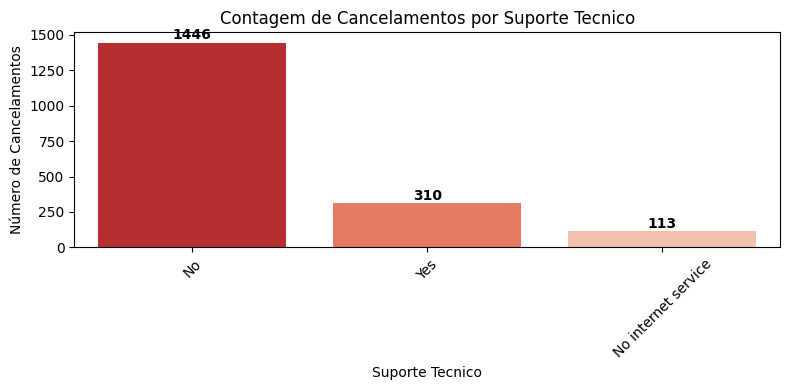

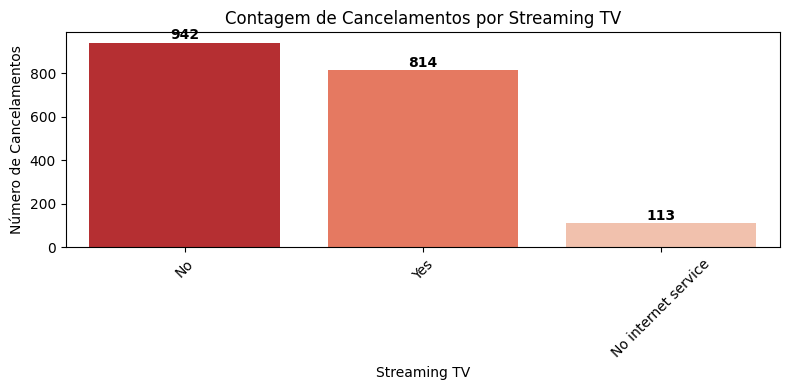

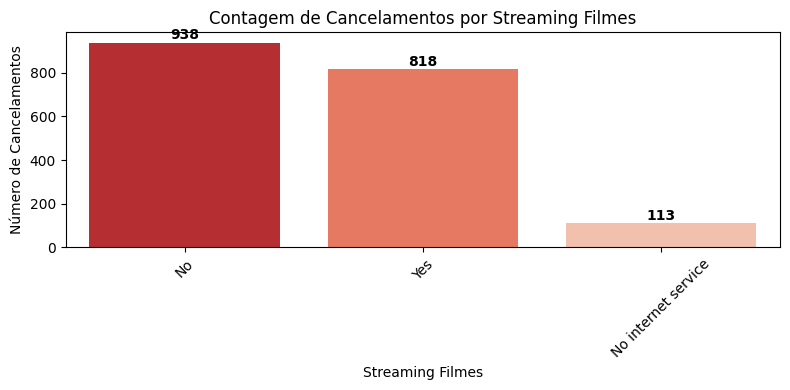

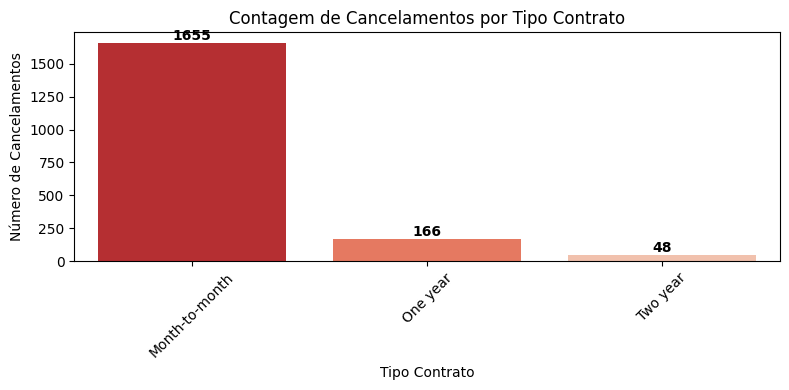

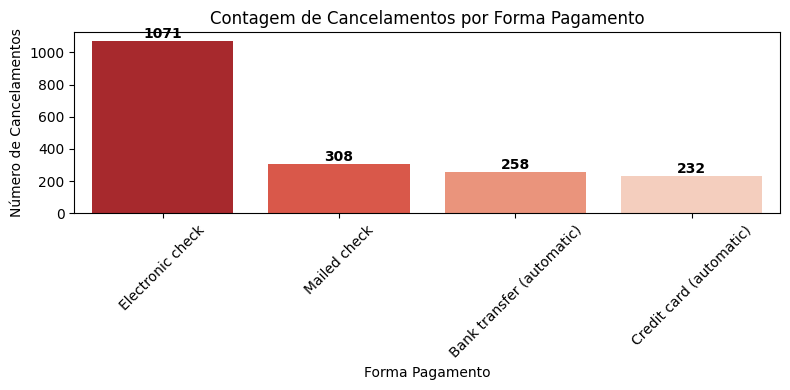

In [27]:
categoricas = [col for col in df_normalizado.select_dtypes(include='object').columns if col not in ['customerID', 'Churn']]

for col in categoricas:
    plt.figure(figsize=(8, 4))
    churn_data = df_normalizado[df_normalizado['Churn'] == 1]
    churn_counts = churn_data[col].value_counts()
    ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='Reds_r', hue=churn_counts.index)

    for i, value in enumerate(churn_counts.values):
        ax.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')
    plt.title(f'Contagem de Cancelamentos por {col}')
    plt.ylabel('Número de Cancelamentos')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [28]:
binarias_numericas = ['Idoso', 'Parceiro', 'Dependentes', 'Servico Telefonico', 'Fatura Online']

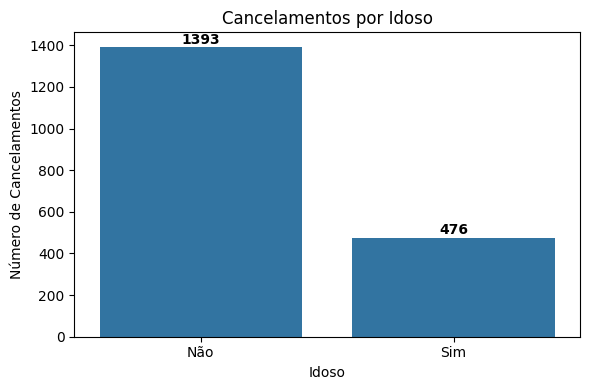

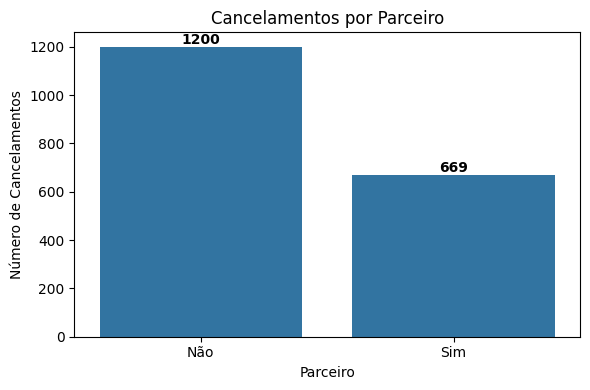

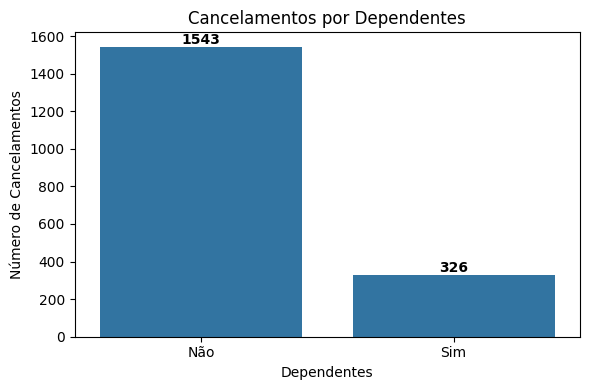

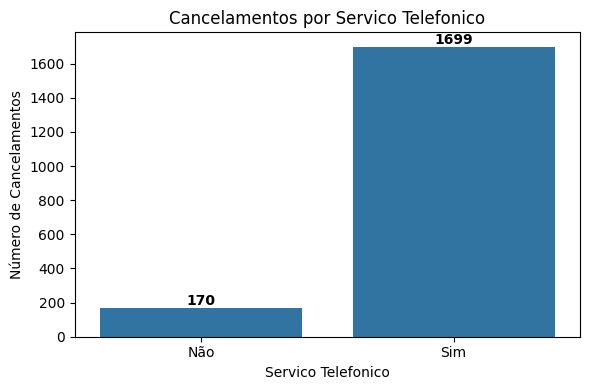

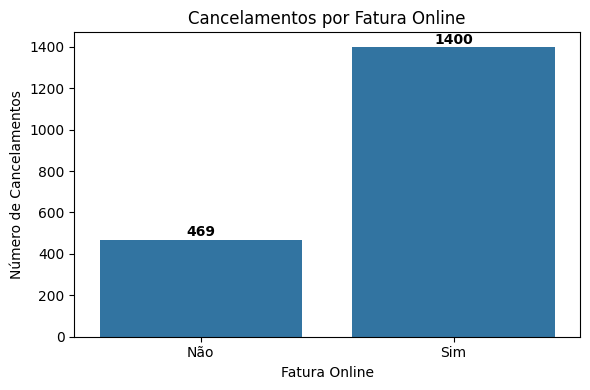

In [29]:
for col in binarias_numericas:
    plt.figure(figsize=(6, 4))
    churn_data = df_normalizado[df_normalizado['Churn'] == 1]
    churn_counts = churn_data[col].value_counts().sort_index()
    labels = churn_counts.index.map({0: 'Não', 1: 'Sim'})

    ax = sns.barplot(x=labels, y=churn_counts.values)
    for i, value in enumerate(churn_counts.values):
        ax.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

    plt.title(f'Cancelamentos por {col}')
    plt.ylabel('Número de Cancelamentos')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Agora, faremos o mesmo mas para as variáveis numéricas

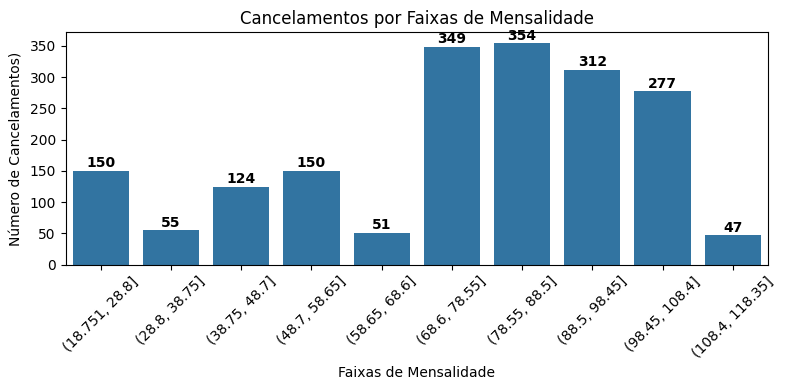

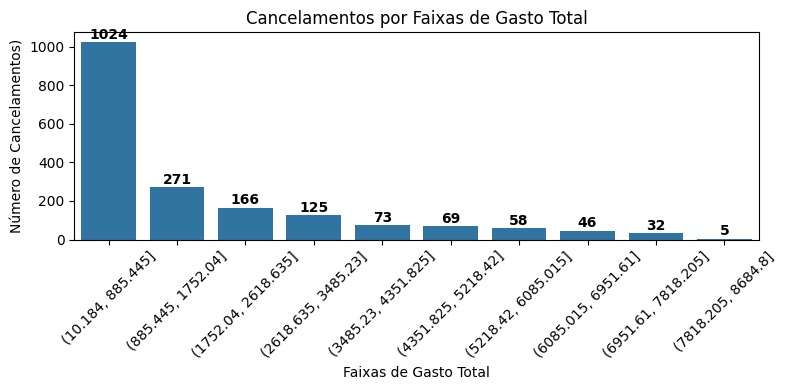

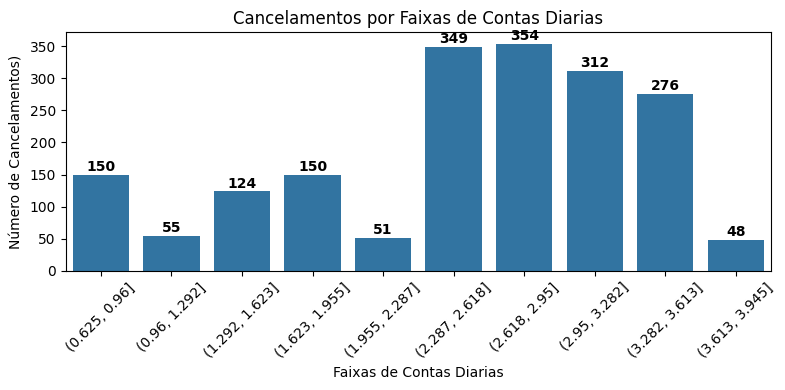

In [30]:
numericas = ['Mensalidade', 'Gasto Total', 'Contas Diarias']

for col in numericas:
    plt.figure(figsize=(8, 4))
    churn_data = df_normalizado[df_normalizado['Churn'] == 1].copy()
    churn_data['binned'] = pd.cut(churn_data[col], bins=10)
    churn_counts = churn_data['binned'].value_counts().sort_index()

    ax = sns.barplot(x=churn_counts.index.astype(str), y=churn_counts.values)
    for i, value in enumerate(churn_counts.values):
        ax.text(i, value + 1, str(value), ha='center', va='bottom', fontweight='bold')

    plt.title(f'Cancelamentos por Faixas de {col}')
    plt.ylabel('Número de Cancelamentos)')
    plt.xlabel(f'Faixas de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

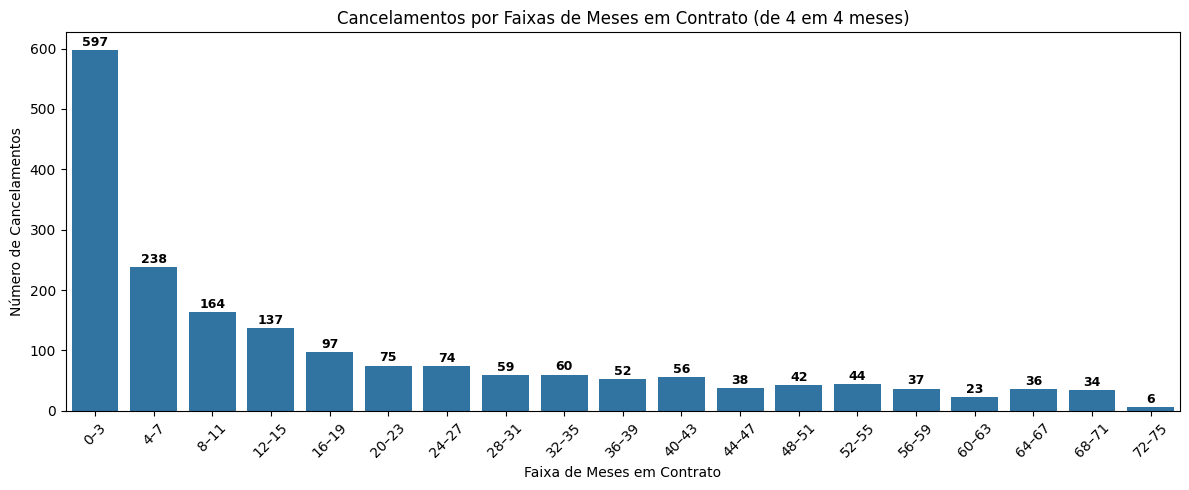

In [31]:
churn_data = df_normalizado[df_normalizado['Churn'] == 1].copy()

max_meses = churn_data['Meses Contrato'].max()
bins = list(range(0, max_meses + 5, 4))

labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]

churn_data['Faixa_Meses'] = pd.cut(
    churn_data['Meses Contrato'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=False
)

cancelamentos_faixa = churn_data['Faixa_Meses'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=cancelamentos_faixa.index, y=cancelamentos_faixa.values)

for i, value in enumerate(cancelamentos_faixa.values):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.title('Cancelamentos por Faixas de Meses em Contrato (de 4 em 4 meses)')
plt.xlabel('Faixa de Meses em Contrato')
plt.ylabel('Número de Cancelamentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Por fim, vamos analisar a correlação entre todas essas variáveis.

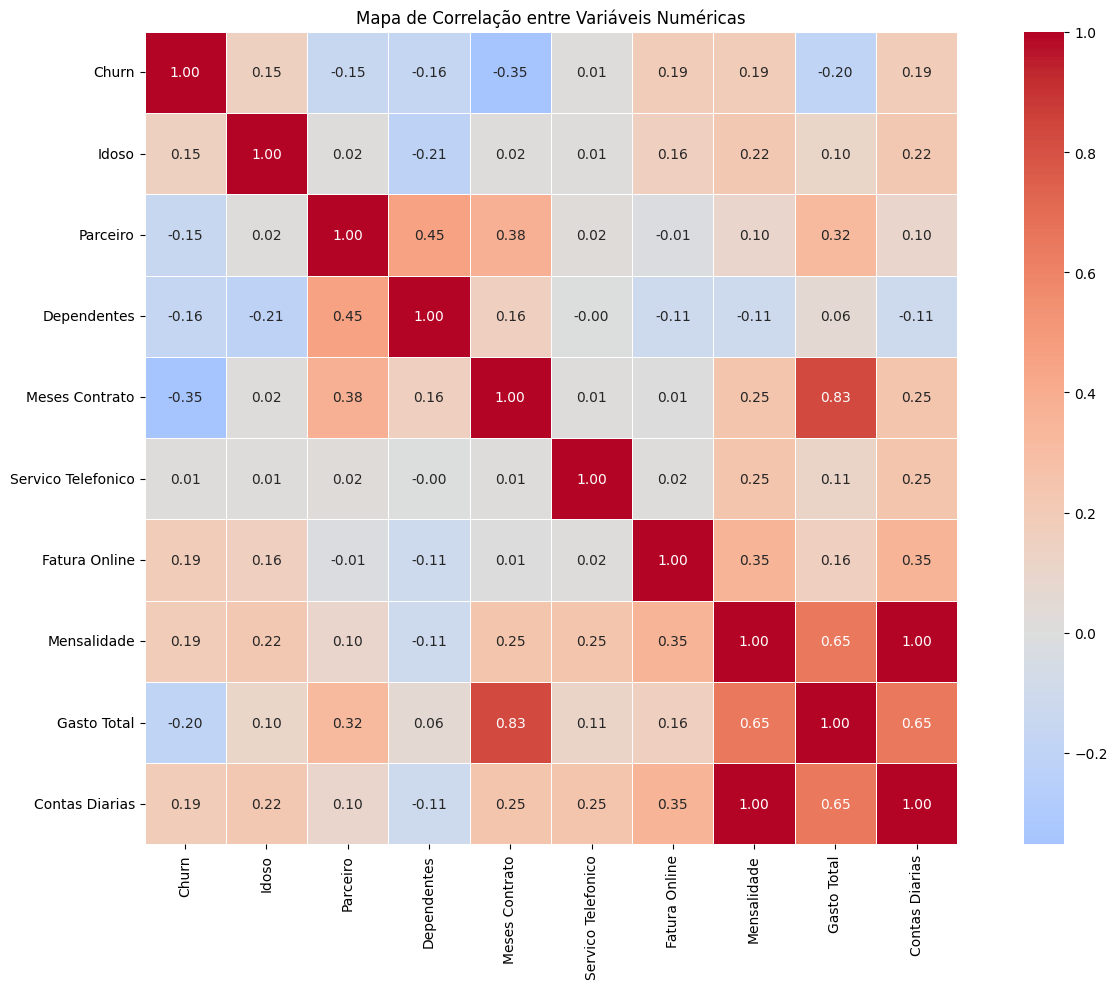

In [32]:
df_numerico = df_normalizado.select_dtypes(include=['int64', 'float64'])
matriz_corr = df_numerico.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

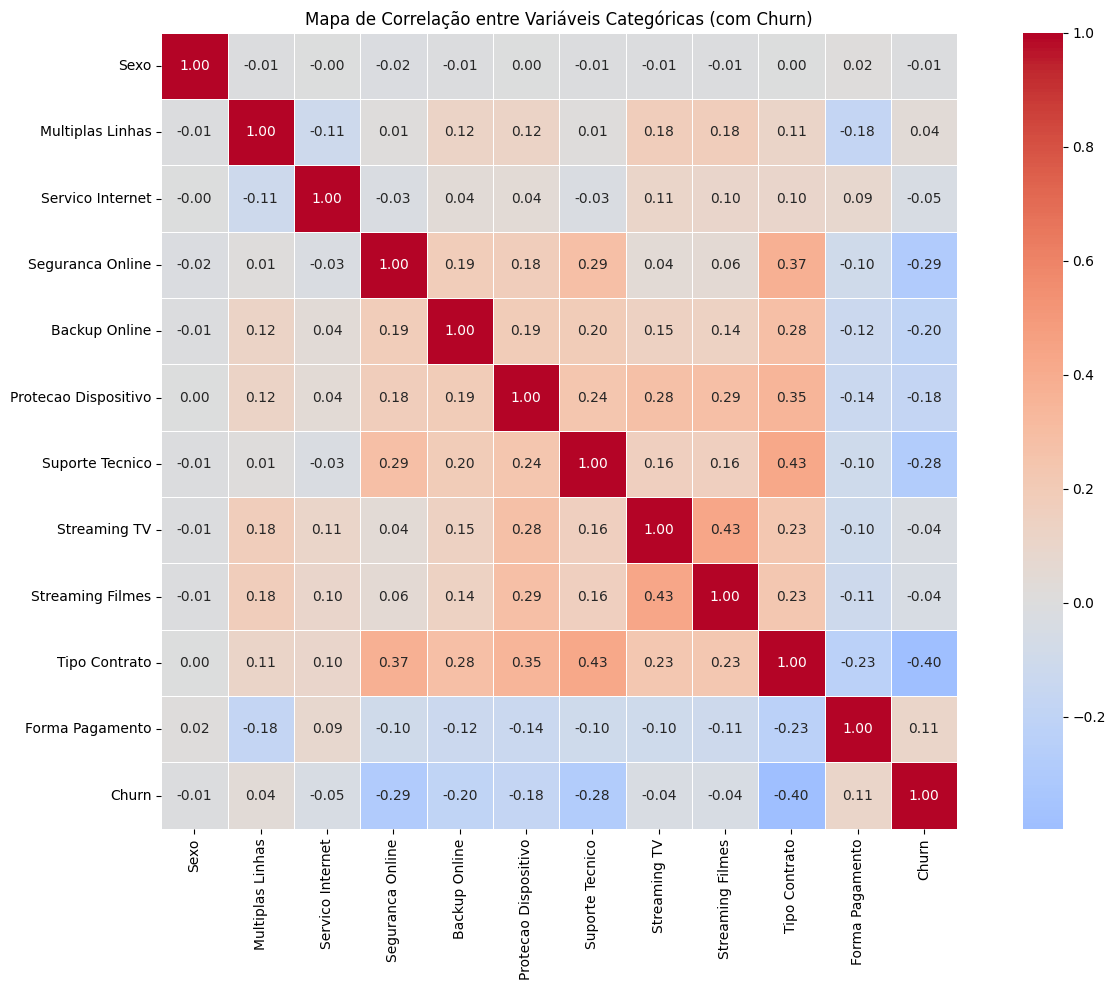

In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [col for col in df_normalizado.select_dtypes(include='object').columns if col != 'customerID']
cat_cols_com_churn = cat_cols + ['Churn']
df_corr = df_normalizado[cat_cols_com_churn].copy()

le = LabelEncoder()
for col in cat_cols:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))


matriz_corr_cat_churn = df_corr.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr_cat_churn,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            square=True,
            linewidths=0.5)

plt.title("Mapa de Correlação entre Variáveis Categóricas (com Churn)")
plt.tight_layout()
plt.show()

# Relatório de Análise de Churn de Clientes da TelecomX

## Introdução

O objetivo desta análise é examinar os dados de clientes da empresa de telecomunicações TelecomX para identificar os principais fatores que levam à evasão de clientes. Ao compreender os padrões e as características dos clientes que cancelam seus serviços, a empresa pode desenvolver estratégias mais eficazes para reduzir essa taxa, melhorar a satisfação e aumentar a retenção.



---



## Limpeza e Tratamento de Dados

Para preparar os dados para a análise, foram realizados os seguintes passos de importação, limpeza e tratamento, conforme detalhado no notebook:

### Importação de Bibliotecas e Extração de Dados:

- Foram importadas as bibliotecas pandas para manipulação de dados, e matplotlib e seaborn para visualização.
- Os dados foram extraídos de um arquivo JSON disponível em uma URL pública.

### Normalização de Dados Aninhados:

- O arquivo JSON continha colunas com dados aninhados (customer, phone, internet, e account). Esses dados foram "achatados" e normalizados usando a função pd.json_normalize() para que cada informação se tornasse uma coluna distinta no DataFrame.
- O DataFrame resultante foi concatenado para formar uma tabela única e coesa.

### Conversão e Limpeza de Tipos de Dados:

- A coluna Charges.Total (Gasto Total) foi identificada como do tipo object (texto) e continha valores não numéricos. Ela foi convertida para um tipo numérico para possibilitar cálculos, e os valores que não puderam ser convertidos foram transformados em nulos (NaN).
- Foram identificados 11 valores nulos na coluna Charges.Total, correspondendo a clientes com 0 meses de contrato (tenure). Presumiu-se que esses eram clientes novos, e o valor nulo foi preenchido com 0.
- A coluna Churn continha valores vazios, que foram removidos para garantir a consistência da análise.

### Transformação de Variáveis:

- Variáveis categóricas binárias que continham "Yes" ou "No" (Churn, Partner, Dependents, PhoneService, PaperlessBilling) foram convertidas para o formato numérico (1 para "Yes" e 0 para "No") para facilitar a análise quantitativa.
- Uma nova coluna, Contas Diarias, foi criada dividindo-se o valor de Charges.Monthly por 30, para fornecer uma visão de custo diário.

### Padronização dos Nomes das Colunas:

- Os nomes das colunas foram traduzidos para o português para tornar o relatório e as visualizações mais claros e compreensíveis (ex: gender para Sexo, tenure para Meses Contrato).



---



## Análise Exploratória de Dados
A análise exploratória revelou diversos padrões sobre os clientes que cancelaram o serviço. A seguir, são apresentadas as principais visualizações e suas interpretações.

### Distribuição Geral do Churn
- A maioria dos clientes permaneceu com a empresa, mas uma parcela significativa (1.869 clientes, ou 26,5%) cancelou o serviço, justificando a necessidade desta análise para entender suas motivações.

### Cancelamentos por Variáveis Categóricas
A análise da evasão em diferentes segmentos de clientes mostrou padrões claros:

- Tipo de Contrato: Clientes com contrato Mês a Mês (Month-to-month) têm uma taxa de cancelamento drasticamente maior (mais de 1600 clientes) em comparação com aqueles com contratos de Um Ano ou Dois Anos.
- Serviço de Internet: A grande maioria dos clientes que cancelaram utilizava o serviço de Fibra Óptica (Fiber optic).
- Forma de Pagamento: Clientes que pagam por Cheque Eletrônico (Electronic check) apresentam a maior taxa de churn.
- Serviços Adicionais: A ausência de serviços de proteção e suporte está fortemente correlacionada com o churn. Clientes sem Segurança Online (OnlineSecurity), sem Backup Online (OnlineBackup), sem Proteção de Dispositivo (DeviceProtection) e sem Suporte Técnico (TechSupport) cancelaram em números muito maiores do que aqueles que possuíam esses serviços.

### Cancelamentos por Variáveis Binárias

- Idosos (SeniorCitizen): Embora representem uma parcela menor da base de clientes, os idosos têm uma proporção de cancelamento notavelmente alta em relação à sua representatividade.
- Dependentes e Parceiros: Clientes que não possuem parceiros e não possuem dependentes são significativamente mais propensos a cancelar.
- Fatura Online (PaperlessBilling): Clientes que optam pela fatura online cancelam mais do que aqueles que não a utilizam.



---



## Conclusões e Insights
A análise dos dados permite extrair as seguintes conclusões sobre o perfil do cliente com maior probabilidade de Churn:

- **O Tipo de Contrato é o Fator Mais Crítico:** A flexibilidade do contrato "Mês a Mês" facilita o cancelamento. Clientes com contratos de longo prazo (1 ou 2 anos) demonstram um comprometimento maior e, consequentemente, uma taxa de churn muito menor.
- **A Qualidade do Serviço de Internet é Determinante:** O alto churn entre clientes de Fibra Óptica, apesar de ser um serviço premium, pode indicar problemas de qualidade, instabilidade, ou uma percepção de custo-benefício desfavorável em comparação com o serviço DSL.
- **Falta de Suporte e Segurança Gera Fricção:** A ausência de serviços como Suporte Técnico e Segurança Online está diretamente ligada à evasão. Isso sugere que clientes que enfrentam problemas técnicos ou se sentem inseguros com o serviço tendem a cancelar se não encontrarem o suporte necessário.
- **O Perfil Demográfico Influencia a Retenção:** Clientes sem laços fortes (sem parceiro ou dependentes) e idosos apresentam maior propensão ao churn. Este grupo pode ser mais sensível a preço, qualidade ou pode ter necessidades de uso diferentes.



---



## Recomendações
Com base nas conclusões, as seguintes ações são recomendadas para a TelecomX reduzir sua taxa de Churn:

### Incentivar Contratos de Longo Prazo:
- Oferecer descontos progressivos ou benefícios exclusivos (como pacotes de streaming gratuitos ou upgrade de velocidade) para clientes que migrarem do plano "Mês a Mês" para contratos de 1 ou 2 anos.

### Investigar e Melhorar o Serviço de Fibra Óptica:
- Realizar uma análise aprofundada da qualidade da rede de fibra. Coletar feedback de clientes que cancelaram para identificar as causas raiz da insatisfação (ex: instabilidade, velocidade abaixo do prometido, problemas de instalação).

### Agregar Valor com Serviços de Suporte e Segurança:
- Oferecer pacotes que incluam "Segurança Online" e "Suporte Técnico" como um diferencial, especialmente para clientes com contrato de Fibra Óptica.
- Criar uma campanha de marketing para ressaltar os benefícios desses serviços e como eles melhoram a experiência do usuário.

### Desenvolver Ações Focadas em Segmentos de Risco:
- Idosos: Criar planos e ofertas específicas para este público, com preços mais competitivos ou pacotes de serviços simplificados e de fácil utilização.
- Clientes sem Parceiro/Dependentes: Engajar este grupo com ofertas de fidelidade, como descontos em mensalidades após um determinado período de permanência, para fortalecer o vínculo com a marca.

### Revisar o Processo de Pagamento:
- Analisar por que clientes que usam "Cheque Eletrônico" cancelam mais. Pode haver falhas no processo ou falta de opções mais convenientes. Incentivar a adesão ao débito automático ou cartão de crédito, que estão associados a taxas de churn menores, oferecendo um pequeno desconto na fatura.